### Social Network Ads Solution USing Logistic Regression

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Importing dataset
train_df = pd.read_csv("Social_Network_Ads.csv")
X = train_df.iloc[:,1:4]
y = train_df.iloc[:, 4]

In [3]:
train_df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
### Missing Data
train_df.info()
train_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [5]:
### Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
X.iloc[:,0] = labelencoder_X.fit_transform(X.iloc[:,0])




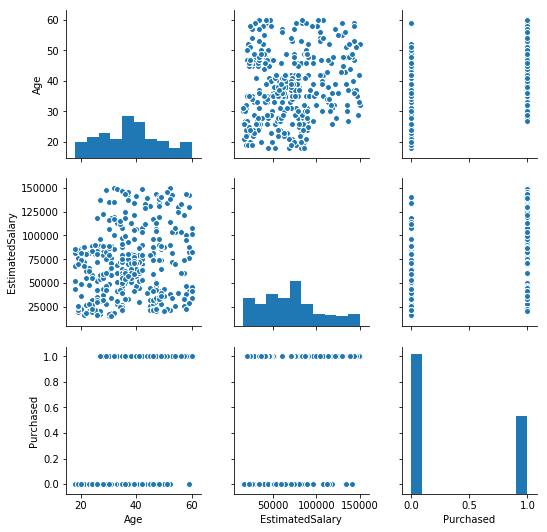

In [6]:
### Apply Stats methods on this clean data
train_df.describe(include="O")
sns.pairplot(train_df.drop(columns=["User ID"]))

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test =train_test_split(X, y, test_size=.2, random_state=0)

In [8]:
X_test.head()

,Gender,Age,EstimatedSalary
132,1,30,87000
309,0,38,50000
341,1,35,75000
196,0,30,79000
246,0,35,50000


In [9]:
### Feature Scaling 
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train_Scaled = sc_X.fit_transform(X_train)
X_test_Scaled = sc_X.fit_transform(X_test)

X_train = pd.DataFrame(X_train_Scaled)
X_test = pd.DataFrame(X_test_Scaled)


In [10]:
X_train.head()

,0,1,2
0,1.025320,1.922950,2.146016
1,-0.975305,2.020161,0.378719
2,-0.975305,-1.382215,-0.432499
3,-0.975305,-1.187794,-1.011940
4,-0.975305,1.922950,-0.925024


In [24]:
### Applying Model i.e. Logistic Regressionin this  case
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train , y_train)
y_pred = classifier.predict(X_test,)

y_pred1=classifier.predict_proba(X_test)
y_pred1

array([[0.76234934, 0.23765066],
       [0.74852983, 0.25147017],
       [0.6565814 , 0.3434186 ],
       [0.83047008, 0.16952992],
       [0.83802666, 0.16197334],
       [0.98153837, 0.01846163],
       [0.97231281, 0.02768719],
       [0.13487962, 0.86512038],
       [0.98479053, 0.01520947],
       [0.3807849 , 0.6192151 ],
       [0.92016228, 0.07983772],
       [0.94077026, 0.05922974],
       [0.72165267, 0.27834733],
       [0.46099808, 0.53900192],
       [0.95443724, 0.04556276],
       [0.48536853, 0.51463147],
       [0.55285901, 0.44714099],
       [0.96302954, 0.03697046],
       [0.00871071, 0.99128929],
       [0.91922745, 0.08077255],
       [0.85126888, 0.14873112],
       [0.02339801, 0.97660199],
       [0.62346899, 0.37653101],
       [0.07090123, 0.92909877],
       [0.99000267, 0.00999733],
       [0.01800366, 0.98199634],
       [0.84399572, 0.15600428],
       [0.82997872, 0.17002128],
       [0.70499214, 0.29500786],
       [0.72806198, 0.27193802],
       [0.

In [12]:
### Preparing the confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve
cm= confusion_matrix(y_test, y_pred)

In [13]:
cm

array([[52,  6],
       [ 3, 19]], dtype=int64)

In [14]:
accur = accuracy_score( y_test, y_pred)
accur

0.8875

Text(0.5,1,'ROC')

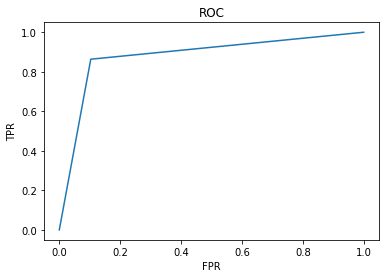

In [18]:
fpr, tpr, threshold=roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')

In [21]:
roc=roc_curve(y_test, y_pred,pos_label=True)

In [22]:
roc

(array([0.        , 0.10344828, 1.        ]),
 array([0.        , 0.86363636, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [ ]:
,